<a href="https://colab.research.google.com/github/Ankythaaa/mini-pythonprojects/blob/main/Big_Mart_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# disableing warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
data = pd.read_csv('train.csv')

In [4]:
# in pandas sample method is used to randomly select rows in the dataset
data.sample(5)
# our target column is Item_Outlet_Sales( which is to be predicted)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
685,FDS10,NaN,Low Fat,0.035015,Snack Foods,182.0318,OUT027,1985,Medium,Tier 3,Supermarket Type3,5954.2494
1181,FDM51,11.80,Regular,0.025967,Meat,102.2674,OUT049,1999,Medium,Tier 1,Supermarket Type1,2444.8176
777,FDK26,5.46,Regular,0.032171,Canned,184.8240,OUT035,2004,Small,Tier 2,Supermarket Type1,4287.7520
5757,FDU10,10.10,Regular,0.045878,Snack Foods,38.5848,OUT018,2009,Medium,Tier 3,Supermarket Type2,484.7024
1857,FDD53,16.20,Low Fat,0.044291,Frozen Foods,43.3454,OUT049,1999,Medium,Tier 1,Supermarket Type1,503.3448


item_identifier contains unique product id item_weight contains weight of the product Item_Fat_Content contains whether the specific product is of low or high fat

In [5]:
# Find Shape of our dataset(number of rows and number of columns)
data.shape

(8523, 12)

In [6]:
# get information about our dataset like total number of rows, total number of columns, datatypes of each column and memory
# gives statistical data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# check the null values in the dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# calculating percentage of missing values for each column
per = data.isnull().sum() * 100 / len(data)

In [9]:
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [10]:
# taking care of the duplicate values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [11]:
# any method is going to be apllied to teh boolean series if it is true it will return true else it will return false
data.duplicated().any()

False

In [12]:
# handling the missing values
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [13]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

we can observe that item_weight has numerical value hence to fill out the numerical values we need to use different stratergies also the column outlet_size has categorical values so we need to fix the missing values in that

# **To fill the missing values in the numerical data we have two approaches**

a) univariate imputation- involves filling missing values using only information from the column with the missing data common methods are -mean imputation(average of the known values) -median imputation -mode imputation(most frequent value in the known values) -constant value imputation -interploation(time points) b) bivariate imputation(multivariate impuation)- involves filling missing values using the other columns as well common methods are -regression imputation -KNN -machine learning based imputation

# **Univariate Impuation**

In [14]:
mean_weight = data['Item_Weight'].mean()
median_weight = data['Item_Weight'].median()

In [15]:
print(mean_weight)

12.857645184135976


In [16]:
print(median_weight)

12.6


In [17]:
# filling the missing values using mean and median
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [18]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [19]:
# we use var() method to find the variance
print("Original Weight variable variance :",data['Item_Weight'].var())
print("Item Weight variable variance  after mean imputation :",data['Item_Weight_mean'].var())
print("Item Weight variable variance after median impuation :",data['Item_Weight_median'].var())

Original Weight variable variance : 21.561688259836558
Item Weight variable variance  after mean imputation : 17.86012173506058
Item Weight variable variance after median impuation : 17.869561454073647


# **after applying mean and median imputation the variance of the data is decreasing ie 21 -> 17**

# **Checking the distribution of data**

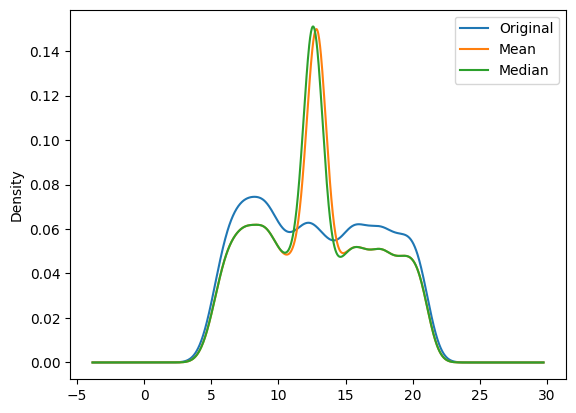

In [20]:
data['Item_Weight'].plot(kind = "kde", label="Original" )

data['Item_Weight_mean'].plot(kind = "kde", label="Mean" )

data['Item_Weight_median'].plot(kind = "kde", label="Median" )

plt.legend()
plt.show()

<Axes: >

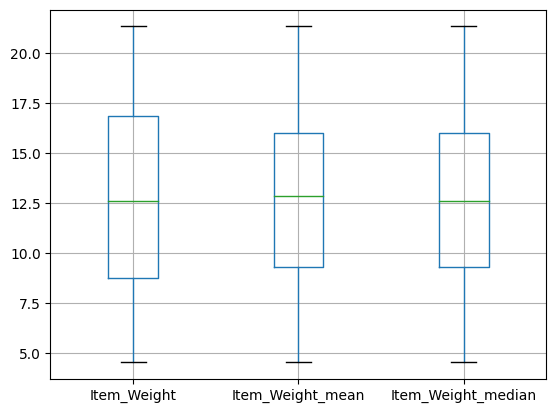

In [21]:
data[['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']].boxplot()

# **Here we observe that after applying the mean and median impuatation the there is a decrease in the spread of the data hence this must be resolved**

In [22]:
# we are applying linear interploation method to fill the missing values
data['Item_Weight_interpolate'] = data['Item_Weight'].interpolate(method="linear")


In [23]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3,9.3


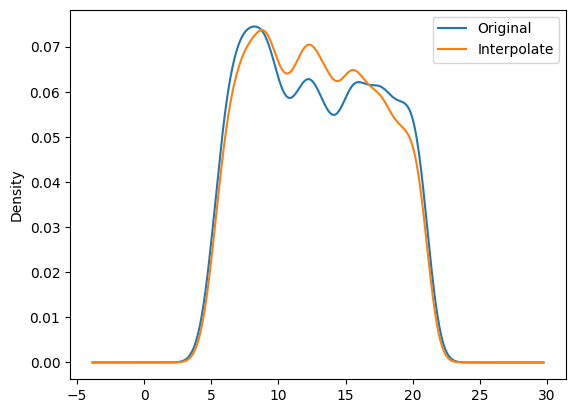

In [24]:
data['Item_Weight'].plot(kind = "kde", label="Original" )

data['Item_Weight_interpolate'].plot(kind = "kde", label="Interpolate" )

plt.legend()
plt.show()

# **Here we can observe that the distributions are very close hence we can conclude that interpolation method is better than mean or median imputation to fill the missing values of the column Item_weight**

## **Multivariate Imputation**

In [25]:
# we use k nearest neighbours
from sklearn.impute import KNNImputer

In [26]:
# creating an instance of the KNN
knn = KNNImputer(n_neighbors=10, weights="distance")

In [27]:
# ravel is used to remove the error
data['KNN_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

# **KNN imputer is used to fill the missing numerical values in the dataset, it works by identifying the k nearest datapoints with available values for the missing entry and then compute the weighted average of those values to fill the missing entry( the similar datapoints often have similar values)**

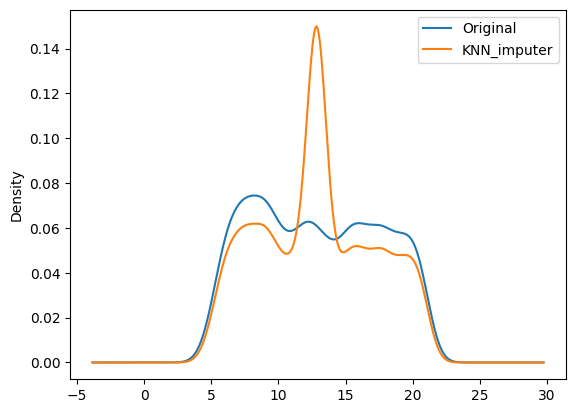

In [28]:
data['Item_Weight'].plot(kind = "kde", label="Original" )

data['KNN_imputer'].plot(kind = "kde", label="KNN_imputer" )

plt.legend()
plt.show()

by this we can conclude that linear interpolation is the referred method to fill the missing values for the column Item_weight

In [29]:
# hence we remove the other column
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate,KNN_imputer
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3,9.3,9.3


In [30]:
data = data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'KNN_imputer'], axis=1)

In [31]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [32]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

**Now let us fill the missing values present in the outlet_size column which contains categorical data**

In [33]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [34]:
# we are going to fill the missing values in outlet_size using outlet_type column
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

# **Here we are going to calculate mode for outlet_size based on outlet_type where mode is most frequent value**

In [35]:
mode_outlet = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [36]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
missing_values = data['Outlet_Size'].isnull()

In [38]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [39]:
# let us fill the missing values on the column outlet_size based on outlet_type
data.loc[missing_values,'Outlet_Size']=data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [40]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

# **Here we have successfully filled all the missing values**

# **Item_Fat_Content**

In [41]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [42]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

here we observe that LF, low fat is same as Low Fat similarly reg is same as Regular

In [43]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [44]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

now we have consistent labeling to different variants of low fat and regular

# **Item_Visibility**

In [45]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [46]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [47]:
# here we are replacing 0 with nan hence we are able to handle them better and filling the missing values using linear interpolation
data['Item_Visibility_interpolate'] = data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [48]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [49]:
data['Item_Visibility_interpolate'].value_counts()

Item_Visibility_interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

we have successfully handled zero's as missing values

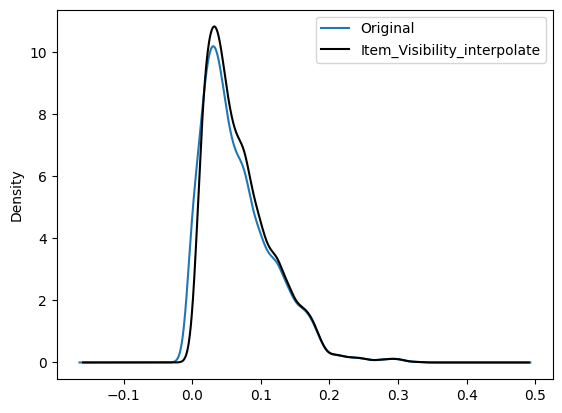

In [50]:
# checking the distribution before and after interpolation
data['Item_Visibility'].plot(kind="kde", label="Original")
data['Item_Visibility_interpolate'].plot(kind="kde", color='black', label="Item_Visibility_interpolate")

plt.legend()
plt.show()

we observe that the distributions are very close to eachother

In [51]:
# lets drop the original column
data = data.drop('Item_Visibility',axis=1)

In [52]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


# **Item_Type**

In [53]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [54]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

# **Item_Identifier**

In [55]:
data['Item_Identifier'].value_counts().sample(5)

Item_Identifier
FDQ36    7
DRG03    5
DRE01    2
FDJ16    5
FDB38    5
Name: count, dtype: int64

In [56]:
# creating a new column which contains first two characters only of the column Item_Identifier
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x : x[:2])

In [57]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

i.e food, nonconsumables and drinks

# **Outlet_Establishment_Year**


In [58]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_interpolate'],
      dtype='object')

In [59]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [60]:
# we are going to create a new column which contains for how many years the outlet is present
# we need to convert year to age
# i.e outletage as per the outletyear
import datetime as dt


In [61]:
current_year = dt.datetime.today().year

In [62]:
current_year

2024

In [63]:
data['Outlet_age'] = current_year - data['Outlet_Establishment_Year']

In [64]:
data['Outlet_age']

0       25
1       15
2       25
3       26
4       37
        ..
8518    37
8519    22
8520    20
8521    15
8522    27
Name: Outlet_age, Length: 8523, dtype: int64

In [65]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


In [66]:
# now lets drop the original column
data = data.drop('Outlet_Establishment_Year', axis=1)

In [67]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,25


# **Handling the categorical columns**

performing categorical data encoding using ordinal encoding, because ml models only understand numerical data . In ordinal encoding unique numerical values will be assigned to each category

labelEncoding is done on y not x hence we use oridinalencoding

In [68]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded = data.copy()

# here we are including only categorical values i.e object
cat_cols = data.select_dtypes(include=['object']).columns

# creating an instance of ordinalencoding using for loop
for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])

    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [69]:
data_encoded.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15


Now let us store independent variables in x and dependent variable in y

In [70]:
X = data_encoded.drop('Item_Outlet_Sales', axis=1)
y = data_encoded['Item_Outlet_Sales']

In [71]:
# independent variable
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


In [72]:
# dependent variable
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# **Random Forest Regressor**


In [73]:
from sklearn.ensemble import RandomForestRegressor


# to perform cross validation
from sklearn.model_selection import cross_val_score

# creating an instance of randomforestregressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#cv=5 means 5 crosss validations are going to be performed and r2 is r square
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())

0.555040442702387


# **XGBRFRegressor (Extreme Gradient Boosting Random Forest Regressor)**

In [74]:
from xgboost import XGBRFRegressor

# creating an instance of XGBRFR
xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5955270459526943


# comparing random forest and xgbrf, xgbrf is the best model for this dataset

# **XGBRFRegressor Feature importances**

In [75]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_

}).sort_values(by='XGBRF_importance',ascending=False) # printing in desending order

,feature,XGBRF_importance
7,Outlet_Type,0.428726
10,Outlet_age,0.154613
3,Item_MRP,0.143704
5,Outlet_Size,0.136857
4,Outlet_Identifier,0.118608
6,Outlet_Location_Type,0.008615
9,Item_Visibility_interpolate,0.002940
8,Item_Weight_interpolate,0.002302
2,Item_Type,0.001865
0,Item_Identifier,0.001068


here we are going to select the top 5 columns which are having highest XGBRF_importance then the rest

In [76]:
['Outlet_Location_Type','Item_Visibility_interpolate','Item_Weight_interpolate',
 'Item_Type','Item_Identifier','Item_Fat_Content']

['Outlet_Location_Type',
 'Item_Visibility_interpolate',
 'Item_Weight_interpolate',
 'Item_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [77]:
# now let us check the r square score after droping the above columns

from xgboost import XGBRFRegressor

# creating an instance of XGBRFR
xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg1,X.drop(['Outlet_Location_Type',
                                     'Item_Visibility_interpolate',
                                     'Item_Weight_interpolate',
                                     'Item_Type',
                                     'Item_Identifier',
                                     'Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5961723971108985


here we notice an improvement in the r square score

Let us create a final dataframe after dropping all the above columns

In [78]:
final_data = X.drop(columns=['Outlet_Location_Type',
                                     'Item_Visibility_interpolate',
                                     'Item_Weight_interpolate',
                                     'Item_Type',
                                     'Item_Identifier',
                                     'Item_Fat_Content'],axis=1)

In [79]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


# **Best Model**

training the XGBRF on the entire dataset i.e the final dataset

In [80]:
from xgboost import XGBRFRegressor

In [81]:
xg_final = XGBRFRegressor()

In [82]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [83]:
# checking Mean Absolute Error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [84]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,
                                                 test_size=0.20,
                                                 random_state=42)

In [85]:
# training the training set
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [86]:
# performing prediction on unseen samples available inside X_test
y_pred = xg_final.predict(X_test)

In [87]:
mean_absolute_error(y_test, y_pred)

714.5479888800818

# **Prediction on unseen data**

In [88]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

2049.1736


In [89]:
print(f"Sales value is between {pred-713.579} and {pred+713.579}")

Sales value is between 1335.594583984375 and 2762.7525839843747


# **Save Model Using Joblib**

In [90]:
import joblib

In [91]:
joblib.dump(xg_final,'bigmart_model')

['bigmart_model']

In [92]:
model = joblib.load('bigmart_model')

In [93]:
p = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(p)

2049.1736


In [94]:
print(f"Sales value is between {p-713.579} and {p+713.579}")

Sales value is between 1335.594583984375 and 2762.7525839843747
